In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px

In [4]:
df = pd.read_csv("Electricity_Capacity.csv", header=None, names=range(47))
table_names = ["Canada", "Newfoundland and Labrador", "Prince Edward Island", "New Brunswick","Quebec", "Ontario","Manitoba", "Alberta", "British Columbia", "Saskatchewan", "Yukon", "Northwest Territories", "Nunavut"]

groups = df[0].isin(table_names).cumsum()

tables = {g.iloc[0,0]: g.iloc[1:-1] for k,g in df.groupby(groups)}

In [5]:
for k,v in tables.items(): 
    print("table:", k)
    print('-'*10)
    print( v)


table: Canada
----------
                     0         1         2         3         4         5   \
1                     _   2005.00   2006.00   2007.00   2008.00   2009.00   
2  Hydro / Wave / Tidal  72877.98  72767.98  73568.98  74471.98  74753.98   
3                  Wind    557.37   1443.04   1823.24   2321.14   3240.14   
4  Biomass / Geothermal   1735.59   1742.19   1742.19   1666.19   1735.29   
5                 Solar     16.75     20.48     25.77     32.72     94.57   
6               Uranium  12805.00  13345.00  13345.00  13345.00  13345.00   
7           Coal & Coke  15647.64  15563.64  15650.64  15471.64  15528.64   
8           Natural Gas  13561.11  13858.78  13954.90  15717.10  15820.33   
9                   Oil   4770.08   4519.44   4524.44   4520.69   4474.83   

         6         7         8         9   ...        37        38        39  \
1   2010.00   2011.00   2012.00   2013.00  ...   2041.00   2042.00   2043.00   
2  75148.98  75464.84  76520.13  75991.44  .

In [6]:
tables2 ={}
for k,v in tables.items(): 
    v.iloc[0,0] = "year"
    v = v.T
    v.columns = v.iloc[0] # set first row as column names
    v = v.iloc[1:] # take all the row except the fisrt one
    v.T
    tables2[k] = v  
  
for k,v in tables2.items():
    print('key', k)
    print( v)
  

key Canada
0     year Hydro / Wave / Tidal      Wind Biomass / Geothermal     Solar  \
1   2005.0             72877.98    557.37              1735.59     16.75   
2   2006.0             72767.98   1443.04              1742.19     20.48   
3   2007.0             73568.98   1823.24              1742.19     25.77   
4   2008.0             74471.98   2321.14              1666.19     32.72   
5   2009.0             74753.98   3240.14              1735.29     94.57   
6   2010.0             75148.98   3746.11              1800.29    281.13   
7   2011.0             75464.84   5171.34              1829.79     419.4   
8   2012.0             76520.13   5883.21              1884.89    647.48   
9   2013.0             75991.44   7467.01              1913.73   1027.63   
10  2014.0             78564.85   9404.99              2368.83   1523.48   
11  2015.0             79677.21  10945.79              2236.93   2135.48   
12  2016.0             80624.68   11766.8               2515.5   2416.06   
1

In [7]:
# for k,v in tables.items(): 
#     print("table:", k)
#     print('data', v.isna().sum())

canada = tables2["Canada"]
canada.isna().sum()

0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64

In [8]:
canada[canada.isnull().any(axis="columns")]

,year,Hydro / Wave / Tidal,Wind,Biomass / Geothermal,Solar,Uranium,Coal & Coke,Natural Gas,Oil


In [9]:
canada.describe().T

,count,unique,top,freq
0,,,,
year,46.0,46.0,2005.00,1.0
Hydro / Wave / Tidal,46.0,34.0,91987.49,11.0
Wind,46.0,46.0,557.37,1.0
Biomass / Geothermal,46.0,37.0,2582.13,6.0
Solar,46.0,45.0,4224.67,2.0
Uranium,46.0,31.0,13345.00,7.0
Coal & Coke,46.0,21.0,0.00,16.0
Natural Gas,46.0,46.0,13561.11,1.0
Oil,46.0,25.0,1810.02,10.0


In [36]:
cad = canada.set_index('year')

In [37]:
cad

,Hydro / Wave / Tidal,Wind,Biomass / Geothermal,Solar,Uranium,Coal & Coke,Natural Gas,Oil
year,,,,,,,,
2005.0,72877.98,557.37,1735.59,16.75,12805.0,15647.64,13561.11,4770.08
2006.0,72767.98,1443.04,1742.19,20.48,13345.0,15563.64,13858.78,4519.44
2007.0,73568.98,1823.24,1742.19,25.77,13345.0,15650.64,13954.9,4524.44
2008.0,74471.98,2321.14,1666.19,32.72,13345.0,15471.64,15717.1,4520.69
2009.0,74753.98,3240.14,1735.29,94.57,13345.0,15528.64,15820.33,4474.83
2010.0,75148.98,3746.11,1800.29,281.13,13345.0,13779.64,18944.95,4609.02
2011.0,75464.84,5171.34,1829.79,419.4,13345.0,13253.64,19354.65,3916.28
2012.0,76520.13,5883.21,1884.89,647.48,13345.0,12419.64,19891.08,3641.15
2013.0,75991.44,7467.01,1913.73,1027.63,14345.0,11445.94,20065.77,3645.15


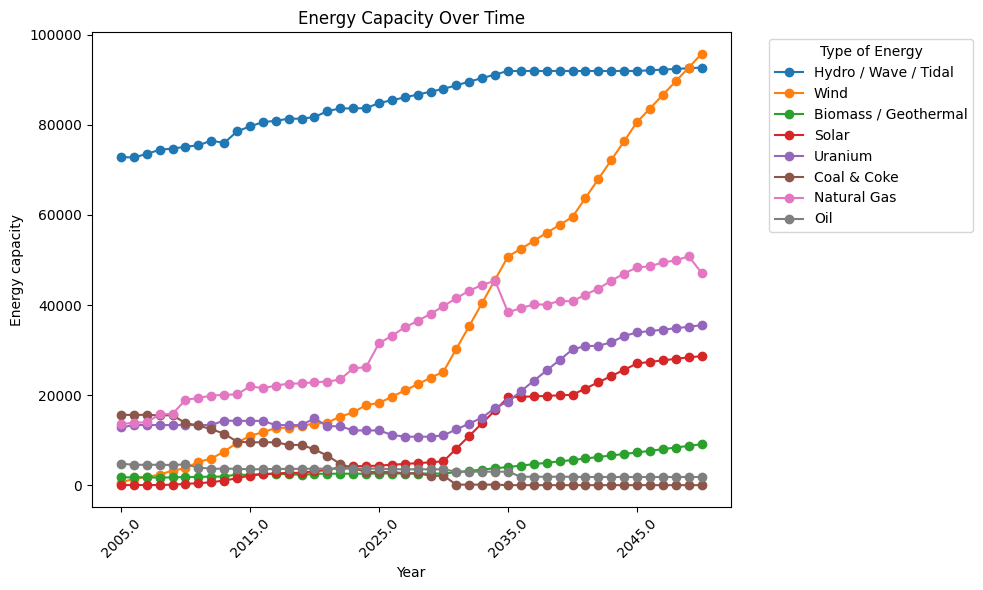

In [38]:


cad.plot(kind='line', marker='o', figsize=(10, 6))
# Add labels and title
plt.title('Energy Capacity Over Time')
plt.xlabel('Year')
plt.ylabel('Energy capacity')
plt.xticks(rotation=45)
# Show the plot
plt.legend(title='Type of Energy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

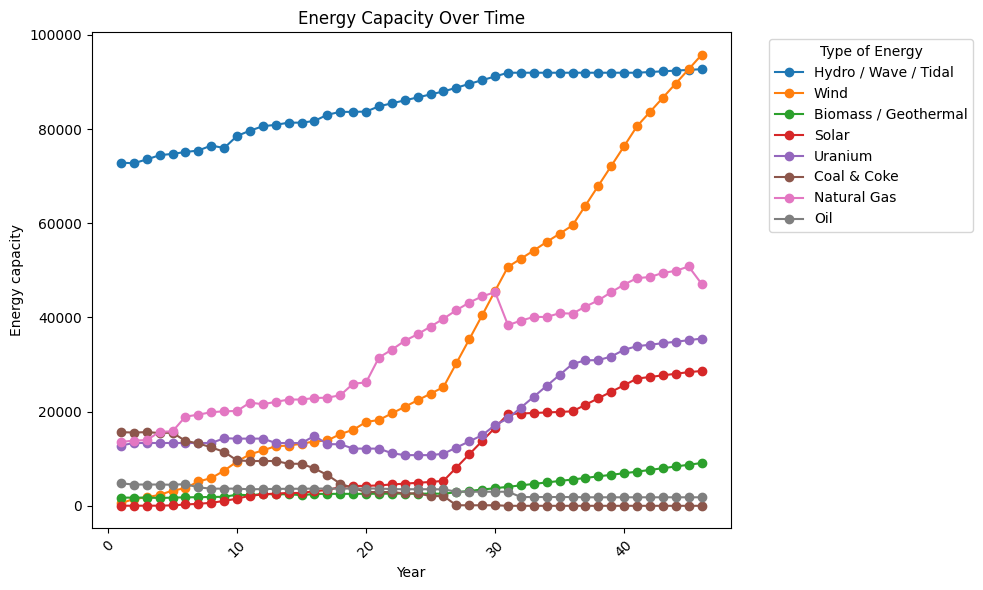

In [23]:

canada.plot( kind='line', marker='o', figsize=(10, 6))
# Add labels and title
plt.title('Energy Capacity Over Time')
plt.xlabel('Year')
plt.ylabel('Energy capacity')
plt.xticks( rotation=45)
# Show the plot
plt.legend(title='Type of Energy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
def plot_timeseries(df, columns):
    df = df.set_index("year").sort_index() # set the index with the value in the columns video_publish_time and sorted it 
    fig = px.line(
        df,
        x=df.index,
        y=columns,
        template="simple_white",
        hover_name="video_title",
        title=f"Development: {', '.join(columns).title()}",
    ) # create a fig using using plotly express with the following arguments(dataframe, axis x, axis y, template hover_name, and the title that will apper )
    fig.update_layout(hovermode="x unified", margin=dict(l=0, r=0, t=50, b=5)) #  hovermode="x unified" is when hovering over data points on the plot, the hover labels will be shown for all traces at the same x-coordinate. This is useful for comparing values across multiple traces.
    return fig

fig = plot_timeseries(df=canada, columns=["Hydro / Wave / Tidal	Wind",	"Biomass / Geothermal",	"Solar", "Uranium",	"Coal & Coke",	"Natural Gas	Oil"])
fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 6, whereas the length of  previously-processed arguments ['year'] is 46